<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/lab_06_01_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 06.01 - Clustering companies

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L06.01", varname="student");

logging in as alexander.amaya@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2024.2
success!! you are logged in
-------------


## Dataset

observe the following dataset with daily stock data from different companies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:

d = pd.read_csv("local/data/company-stock-movements-2010-2015-incl.csv.gz", index_col=0)
d.shape
d


,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [ ]:
d.head()
d.iloc[:,-1]

,2013-10-29
Apple,-19.589981
AIG,0.660000
Amazon,3.740021
American express,0.540001
Boeing,0.309998
Bank of America,-0.110000
British American Tobacco,1.150001
Canon,-0.110001
Caterpillar,0.159996
Colgate-Palmolive,1.050003


In [ ]:

d.index


Index(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar',
       'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron',
       'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics',
       'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot',
       'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase',
       'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard',
       'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar',
       'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble',
       'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony',
       'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total',
       'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever',
       'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon',
       'Xerox', 'Yahoo'],
      dtype='object')

## TASK 1: convert `d` into a signed dataframe

turn all values to 1 if >0 and -1 otherwise

the resulting dataset must look like the following image

**HINT**: use [`numpy.sign`](https://numpy.org/doc/stable/reference/generated/numpy.sign.html)

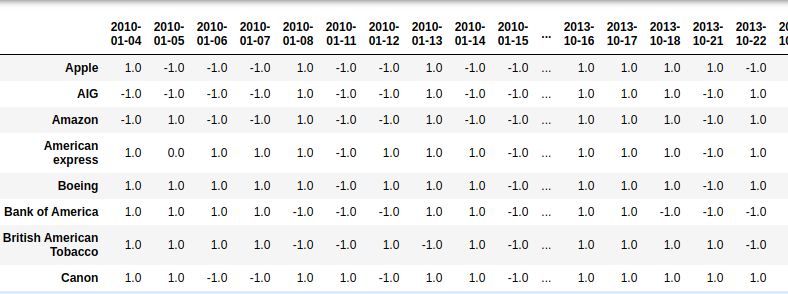

In [ ]:

Image("local/imgs/stock_signed.png")


In [ ]:
signed = np.sign(np.array(d))
df = pd.DataFrame(signed)
df.columns = d.columns.values
df.index = d.index.values
df

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
AIG,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Boeing,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Bank of America,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
British American Tobacco,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
Canon,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
Caterpillar,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
Colgate-Palmolive,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Define the function to convert values to 1 and -1
def signed(df):
    # Apply np.sign to get 1 for positive values and -1 for non-positive values
    result = np.sign(df)
    result[result == 0] = -1  # Replace zeros with -1
    return pd.DataFrame(result, index=df.index, columns=df.columns)

manually check your code

In [ ]:
signed(d)

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
Apple,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
AIG,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
Amazon,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
American express,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
Boeing,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Bank of America,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
British American Tobacco,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
Canon,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
Caterpillar,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0
Colgate-Palmolive,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Exercise 2: implement custom metric

the intuition is that we want our metric to reward sets of symbols moving in sync.

So, given a matrix:
    
1. for each column compute the max number of positions with equal value.
1.  divide by the number of elements in the column
1. average the value for all columns

for instance, for the following matrix

In [ ]:
m  = np.array([[-1,  1,  1, -1],
               [-1, -1,  1, -1],
               [-1, -1,  1,  1],
               [-1, -1, -1,  1],
               [-1,  1,  1, -1],
               [-1, -1,  1, -1]])

1. the number of positions of equal value for each column is `6,4,5,4`
2. normalizing by the number of elements per column (6) is `1,0.6667,.8333,.6667`
3. the mean of the previous result is about `0.792`

**complete the following function** to compute this metric, assuming the input matrix `m` is a numpy array containing only values of -1 and 1

**suggested strategy**: loop over the columns, compute the number of 1's and -1's and keep whichever is grater in each column, divide by the length of m (you will have then one number per column), and take the average.

**challenge 1**: solve it with one line

**challenge 2**: solve it without a loop, but using the `axis` argument  when using `np.sum` and `np.max`

In [ ]:
np.sum(m,axis=0)

array([-6, -2,  4, -2])

In [ ]:
def mean_sync_move(m):
    result = []
    for i in range(m.shape[1]):
        res = np.max(np.array([np.sum(m[:,i] == 1), np.sum(m[:,i] == -1)]))
        result += [res]
    result = np.array(result)/(m.shape[0])
    return np.mean(result)

manually check your code

In [ ]:
mean_sync_move(m)

0.7916666666666666

the following must return `1`

In [ ]:
mean_sync_move(np.ones((10,2)))

1.0

obtain the `mean_sync_move` of the full dataset **AFTER** converting it into signed. It should be around `0.72`

In [ ]:
mean_sync_move(signed(d))

0.7220664589823468

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Cluster the full dataset

complete the following function such that upon receiving a dataset:

- obtains the signed dataset
- uses `sklearn` `KMeans` to cluster the dataset with the given number of clusters (`n_clusters`)
- predicts the cluster number of each company
- for each cluster number:
    - filters the signed dataset so that it keeps the companies belonging to that cluster.
    - computes the `mean_sync_move` of the resulting filtered signed dataset.

your function must return a dataframe with one row per cluster containing

   - the cluster number
   - the number of companies in the cluster
   - the `mean_sync_move` of each cluster
   


for instance, for 4 clusters your resulting dataframe should look like the following one. The cluster numbers might be in a different order, but the index and the columns **MUST** be as illustrated.

**important**: use `random_state=2` when creating the KMeans instance.

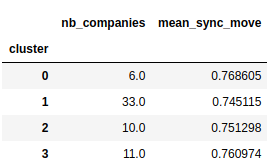

In [ ]:

Image(filename='local/imgs/labclusters.png')


In [ ]:
d.shape

(60, 963)

In [ ]:
from sklearn.cluster import KMeans

def cluster_dataset(d, n_clusters):

    def signed(d):
        return (d.mask(d>0, 1)).mask(d<=0, -1)

    def mean_sync_move(m):
        return (np.array([ max([list(col).count(1),list(col).count(-1)]) for col in m.T]) / len(m)).mean()

    d = signed(d)

    c = KMeans(n_clusters=n_clusters, random_state=2)
    y = c.fit_predict(d)
    clusters = np.unique(y)
    bn_companies = np.array([ list(y).count(l) for l in clusters ])
    mean_sync_m = np.array([ mean_sync_move(d.iloc[np.where(y==m)].values) for m in clusters ])
    data = np.array([clusters, bn_companies, mean_sync_m]).T
    r = pd.DataFrame(data, columns=["cluster", "nb_companies", "mean_sync_move"])

    r.index = r.cluster.values.astype(int)
    r.index.name = "cluster"

    del(r["cluster"])
    return r

In [ ]:
cluster_dataset(d, n_clusters=4)

,nb_companies,mean_sync_move
cluster,,
0,10.0,0.773416
1,6.0,0.777605
2,30.0,0.751610
3,14.0,0.745958


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");

## Compare with PCA

we apply PCA with 2 components to +1/-1 dataset and visualize clusters

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_clusters = 7

X = PCA(n_components=2).fit_transform(signed(d))
y = KMeans(n_clusters=10).fit_predict(signed(d))

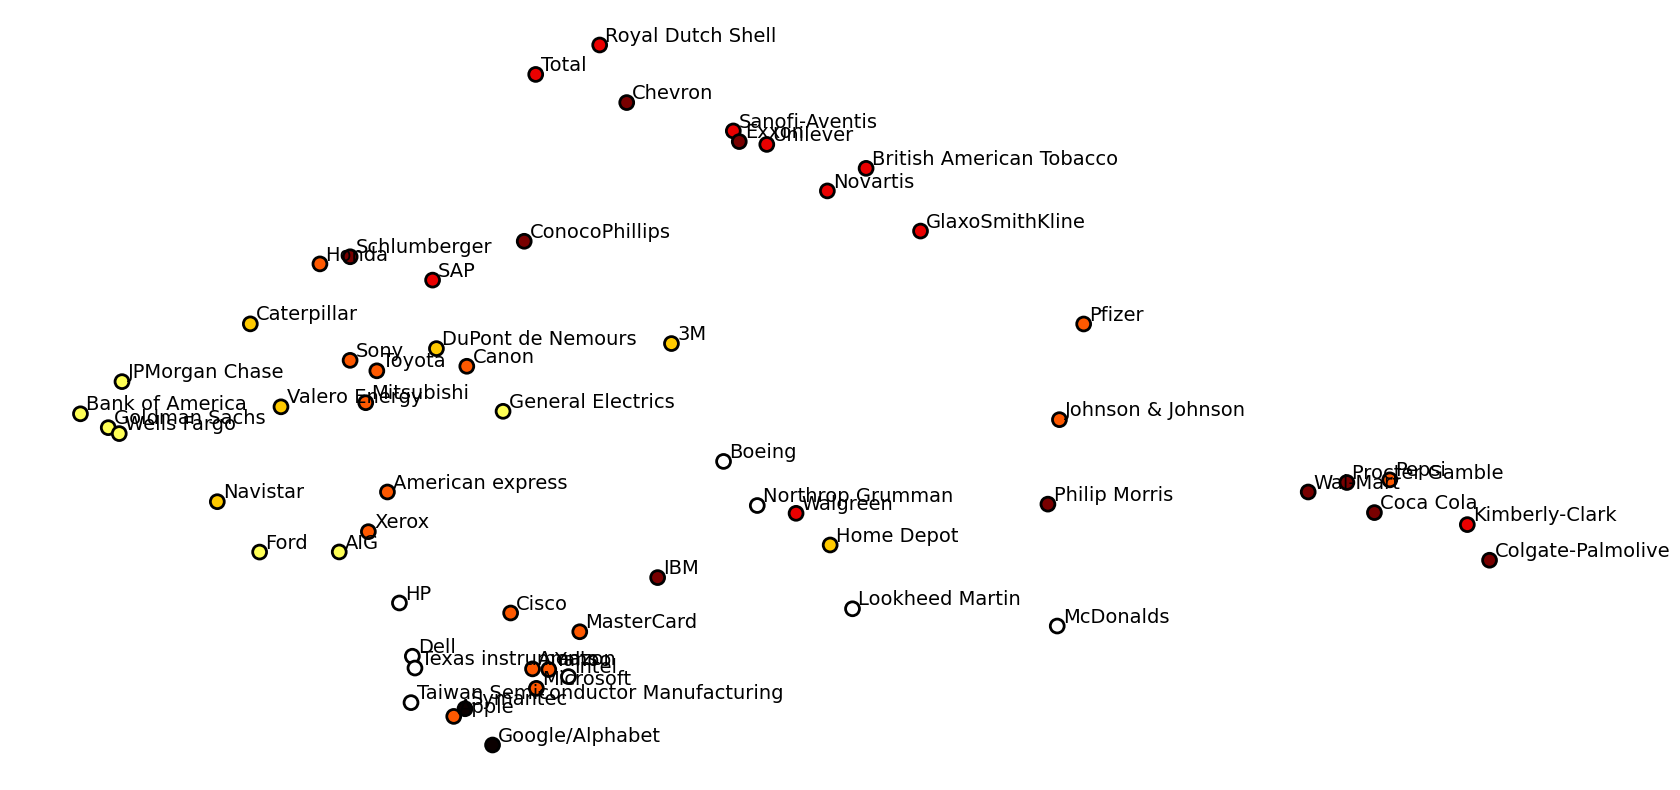

In [ ]:

cmap = plt.cm.hot
plt.figure(figsize=(20,10))
plt.scatter(X[:,0], X[:,1], color=cmap((y*255./(n_clusters-1)).astype(int)), s=100, edgecolor="black", lw=2)
for i in range(len(d)):
    name = d.index[i]
    plt.text(X[i,0]+.1, X[i,1]+.1,d.index[i], fontsize=14)
plt.axis("off");


---
---

## Other suggested exercises

Try the following exercises from O'Reilly's [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/), and its associated [Notebook Repository](https://github.com/jakevdp/PythonDataScienceHandbook) at [Chapter about Clustering](https://github.com/jakevdp/PythonDataScienceHandbook/blob/main/notebooks/05.11-K-Means.ipynb) :

- Clustering, **Exercise 1: k-Means on Digits**
- Clustering, **Exercise 2: k-Means for Color Compression**